# Binomial Distribution

* It is the discrete probability that counts the number of successes in a sequence of $n$ Bernoulli trials.

* A Bernoulli trial is an experiment with two possibile outcome:

    * success, whose probability is $p$
    * insuccess, whose probability is $1-p$



In [3]:
def hide_code_in_slideshow():   
    from IPython import display
    import binascii
    import os
    uid = binascii.hexlify(os.urandom(8)).decode()    
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;
            while (!p.hasClass("cell")) {
                p=p.parent();
                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display.display_html(html, raw=True)


In [4]:
hide_code_in_slideshow() 
import numpy as np
from scipy import stats, special
import matplotlib.pyplot as plt
import arviz as az

from ipywidgets import interact
import ipywidgets as ipyw

In [5]:
hide_code_in_slideshow() 
plt.style.use('arviz-darkgrid')  # aplica estilo a los gráficos
np.random.seed(42)  # semilla para fijar números aleatorios

## Probability

Consider to have a 6-sided dice; each time we roll the dice it is only possible to obtain an integer from 1-6, that is [1, 2, 3, 4, 5, 6]. 
We can simulate the dice in  Python in the following way: 


In [6]:
def dice():
    possible_outcomes = [1, 2, 3, 4, 5, 6]
    return np.random.choice(possible_outcomes)

dice()

4

Suppose we suspect that the dice is rigged. What could we do to assess this possibility?


## Estimating probabilities
Using Python we can simulate data collection as follows. 

In [7]:
def roll_dice(N=10):
    #we collect the drawn values into a list
    outcome = [dice() for i in range(N)]
    
    for i in range(1, 7):
        #we count how many times each item appears 
        print(f'{i}: {outcome.count(i)/N:.2g}')
        
roll_dice()

1: 0
2: 0.1
3: 0.4
4: 0.1
5: 0.4
6: 0


The numbers in the first column are the possible outcomes. Those in the second column correspond to the frequency with which each number appears. The frequency is the number of times each of the possible outcomes appears divided by `N`, where `N` is the total number of times we roll the dice.


* Every time you execute the previous cell, you will get a different result. Every time we throw it we get a number that we cannot predict.

* If we roll the same dice many times, the ability to predict the outcome of a roll does not improve. In that sense, collecting data does not help us. But collecting data does improve the ability to predict the _listing of frequencies_, in fact the ability improves as the value of `N` increases. For a value of `N=10000` you will see that the obtained frequencies are approximately $0.17$ and it turns out to be $0.17 \approx \frac{1}{6}$ which is what we would expect if each number on the die had an equal chance.

## Sample space


The sample space $\mathcal{X}$ is the set of all possible outcomes. An event $A$ is a subset of $\mathcal{X}$.  With a  6-sided die we have:

$$\mathcal{X} = \{1, 2, 3, 4, 5, 6\} $$

We can define the event $A$ as:

$$A = \{2\}$$

The probability of the event $A$ we write $P(A=2)$ or in short $P(A)$.

$P(A)$ can take any value in the interval between 0 and 1 (including both extremes); this is written as [0, 1]. It is important to note that it is not necessarily true that $P(A) = \frac{1}{6}$.

By defining the event $A$ we can use more than one element of $\mathcal{X}$. Some examples would be getting an odd number (always within $\mathcal{X}$) $A = \{1, 3, 5\}$, or numbers greater than or equal to 4 $A = \{4,5,6 \}$, or $A = \{1,2,4,6\}$. For any concrete problem the definition of an event like $A$ will directly depend on the problem.

The sample space $\mathcal{X}$ is the set of all possible outcomes of an experiment. An event $A$ is a subset of $\mathcal{X}$. We say that $A$ has occurred if when performing an _experiment_ we obtain $A$ as a result. If we had a typical 6-sided die we would have:

$$\mathcal{X} = \{1, 2, 3, 4, 5, 6\} \tag {0.0}$$

We can define the event $A$ as:

$$A = \{2\} \tag {0.1}$$

If we want to indicate the probability of the event $A$ we write $P(A=2)$ or in short $P(A)$.

## Events


$P(A)$ can take any value in the interval between 0 and 1 (including both extremes).

By defining the event $A$ we can use more than one element of $\mathcal{X}$.  For instance we can define:
* the event of the dice returning an odd number $\mathcal{X}$) $A = \{1, 3, 5\}$, 
* the event of the dice returning a number equal or larger than  4 $A = \{4,5,6 \}$,

Events are subsets of the sample space, whose probability is comprised  between 0 and 1.

## Events

* If the event is impossible its probability is exactly 0
* If instead the event is sure, its probability is 1.
* All intermediate values reflect  degrees of uncertainty. From  this viewpoint, it makes sense to the probability that it will rain tomorrow. 

This interpretation of  probability is referred to as  Bayesian or subjective.

## Conditional probability

A *conditional* probability is the probability of an event,  updated after knowing that another event has happened. 

Given two events $A$ and $B$ where $P(B) > 0$, the probability of $A$ given $B$ is  as:

$$
P(A \mid B) \triangleq \frac{P(A, B)}{P(B)} 
$$


## Joint probability

$$
P(A \mid B) \triangleq \frac{P(A, B)}{P(B)} 
$$

$P(A, B)$ is the _joint probability_ that is, the probability that the event $A$ happens and that the event $B$ happens; this can be also written as $P(A \cap B)$, the symbol $ \cap$ indicates intersection of sets.


$P(A \mid B)$ is the *conditional* probability, i.e.  the probability that event A occurs given that B has occurred.

## Joint probability
A conditional probability can be visualized as the reduction of the sample space. 

In it you can see how we go from having the events $A$ and $B$ in the sample space $\mathcal{X}$, in the first frame, to having $P(A \mid B)$ in the last frame where the sample space has been reduced from $\mathcal{X}$ to $B$. 


<img src='img/cond.png' width=500 >

The concept of conditional probability allows updating our beliefs about the probability of an event given some  new observations. 
In fact all probabilities are conditional (with respect to some assumption or model) even if we do not express it explicitly.

## Probability distributions
A random variable is a function that associates real numbers $\mathbb{R}$ with a sample space.

If we had two dice we could define a random variable $S$ as the sum of both dice. In this case the random variable would take the values ​​$\{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12$\}$.

If the dices are fair, the probability distribution of the variable would be

<a href="https://en.wikipedia.org/wiki/File:Dice_Distribution_(bar).svg"><img src='img/dist_dos_dados.png' width=500 ></a>





A variable is random in the sense that in each experiment we  obtain a different event without the succession of events following a deterministic pattern.

*  The variable can only take values from its sample space.
*  Random does **not** imply that all items of the sample space have equal probability.


## Discrete variables
* A discrete random variable  take  values from  a finite set.
* The dice is a discrete random variable since it can only take 6 values, without the possibility of intermediate values.

## Probability mass function (pmf)

* A random variable has a _list_ associated with the probability of each event: the  **probability distribution**.

* Dealing with  discrete random variables, this  is also called **probability mass function** (**pmf**). 

* The **pmf** is a function that returns probabilities:  values ​​between [0, 1] and whose  sum over all events is 1.


#### Uniform distributions

The uniform distribution assigns equal probability  to a fine set of values. Its  $pmf$ is:

$$p(k \mid a, b)={\frac {1}{b - a + 1}} = \frac{1}{n}$$

For values of $k$ in the interval  outside this interval $p(k) = 0$, where $n=b-a+1$ is the total number of values that $k$ can take .

Text(0.5, 1.0, 'pmf for a=1, b=6')

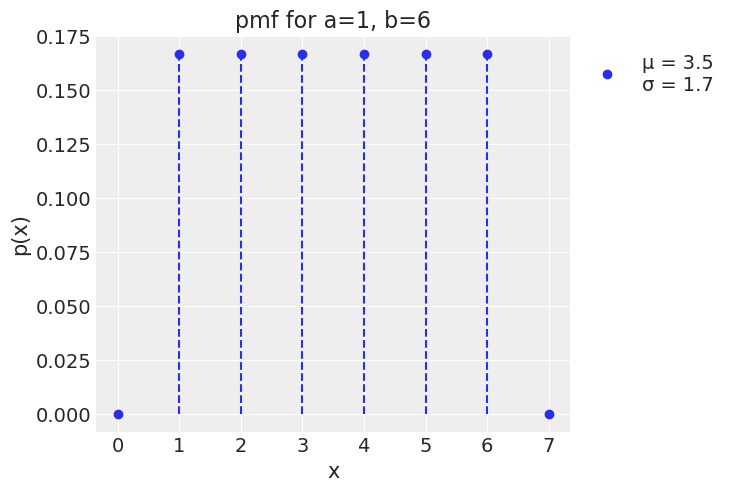

In [9]:
hide_code_in_slideshow() 
a = 1
b = 6
distri = stats.randint(a, b+1)  # lower bound,  upper bound +1
x = np.arange(0, 8)
x_pmf = distri.pmf(x)  #  pmf evaluated for every x
mean, variance = distri.stats(moments='mv')
plt.plot(x, x_pmf, 'C0o',
         label=f'μ = {media:3.1f}\nσ = {varianza**0.5:3.1f}')
plt.vlines(x,  0, x_pmf, colors='C0', linestyles='--')

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('pmf for a=1, b=6')

*  The height of each point indicates the probability of each event.
*  All values ​​less than 1 and greater than 6 have probability 0. 
*  The  uniform distribution assigns the same heigh to all points.

The parameters of the uniform discrete distribution are two:
* the lower bound $a$
* the upper bound $b$ 


The distribution is valid as long as:
* $a < b$
* $a \in \mathbb {Z}$
* $b \in  \mathbb {Z}$

where $\mathbb {Z}$ is the set of the integer numbers.

*  If we change a or b the shape of  the distribution will change.
*  That is why we usually talk about a family of distributions.  Each member of that family is a distribution with a valid combination of parameters.


# Binomial Distribution

* It is the discrete probability that counts the number of successes in a sequence of $n$ Bernoulli trials.

* A Bernoulli trial is an experiment with two possibile outcome:

    * *success*, whose probability is $p$
    * *insuccess*, whose probability is $1-p$

Usually *success* refers to the *rarer* event.



# Binomial Distribution

* Consider a series of 4 independent Bernoulli trials, resulting in two consecutive successes and 2 consecutive insuccesses. 

* Assuming the trials to be independent, the probability of this sequence is $$p^2 \times (1-p)^2$$

* Actually, any sequence of 4 trials, containing 2 successes and 2 insuccesses has the same probability.

* More in general,  a sequence of $n$ trials, containing $k$ successes and $n-k$ insuccesses has  probability:
$$p^k (1-p)^{n-k}$$





# Binomial Distribution

* There are ${{n}\choose{x}} =\frac{x!}{n!(n-x)!}$ ways of disposing $n$ successes and $n-k$ insuccesses within the $n$ trials.



* ${{n}\choose{x}}$ is the *binomial coefficient*

# Binomial Distribution


* The probability of $x$ successes within $n$ trials is thus:

$$p(x \mid n,p) = \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x}$$

* $p^x(1-p)^{n-x}$ is the probability of a sequence of $n$ trials containing $x$ successes and $n-x$ insuccesses
* The binomial coefficient computes all the possible combination of $n$ successes within $n$ trials..

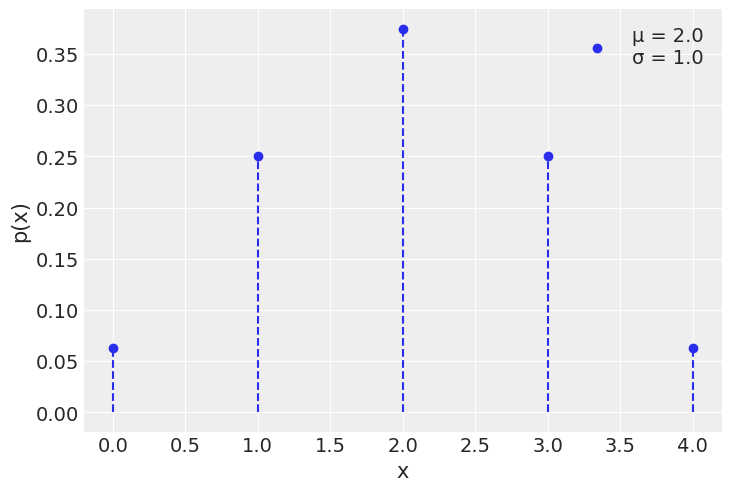

In [8]:
n = 4  # número de intentos
p = 0.5  # probabilidad de "éxitos"
distri = stats.binom(n, p)
x = np.arange(0, n + 1)
x_pmf = distri.pmf(x)  # la pmf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot(x, x_pmf, 'C0o',
         label=f'μ = {media:3.1f}\nσ = {varianza**0.5:3.1f}')
plt.vlines(x,  0, x_pmf, colors='C0', linestyles='--')

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

#### Distribución de Poisson

Es una [distribución](https://en.wikipedia.org/wiki/Poisson_distribution) de probabilidad discreta que expresa la probabilidad que $x$ eventos sucedan en un intervalo fijo de tiempo (o espacio o volumen) cuando estos eventos suceden con una taza promedio $\mu$ y de forma independiente entre si. Se la utiliza para modelar eventos con probabilidades pequeñas (sucesos _raros_) como accidentes de tráfico o decaimiento radiactivo.

$$
p(x \mid \mu) = \frac{\mu^{x} e^{-\mu}}{x!} \tag {0.8}$
$$

Tanto la media como la varianza de esta distribución están dadas por $\mu$. 

A medida que $\mu$ aumenta la distribución de Poisson se aproxima a una distribución Gaussiana (aunque sigue siendo discreta). La distribución de Poisson tiene estrecha relación con otra distribución de probabilidad, la binomial. Una distribución binomial puede ser aproximada con una distribución de Poisson, cuando $n >> p$, es decir, cuando la cantidad de "éxitos" ($p$) es baja respecto de la cantidad de "intentos" (p) entonces $Poisson(np) \approx Binon(n, p)$.  Por esta razón la distribución de Poisson también se conoce como "ley de los pequeños números" o "ley de los eventos raros". Ojo que esto no implica que $\mu$ deba ser pequeña, quien es pequeño/raro es $p$ respecto de $n$.

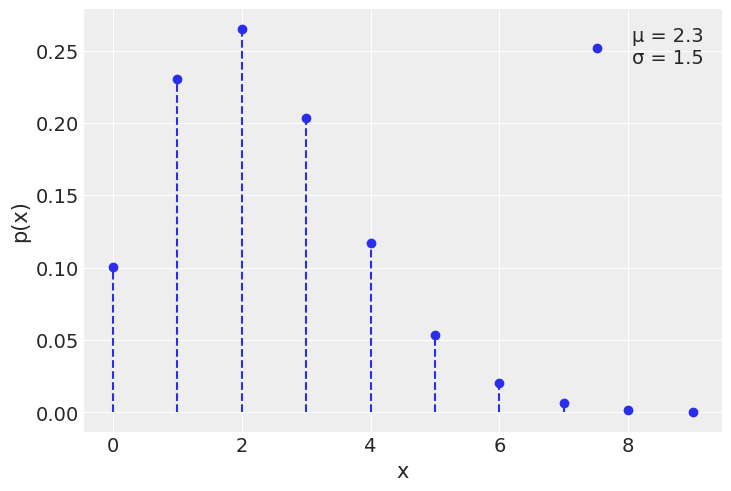

In [9]:
distri = stats.poisson(2.3)  # occurrencia media del evento
x = np.arange(0, 10)
x_pmf = distri.pmf(x)  # la pmf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot(x, x_pmf, 'C0o',
         label=f'μ = {media:3.1f}\nσ = {varianza**0.5:3.1f}')
plt.vlines(x,  0, x_pmf, colors='C0', linestyles='--')

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

### Variables aleatorias y distribuciones de probabilidad continuas

Hasta ahora hemos visto variables aleatorias discretas y distribuciones de masa de probabilidad. Existe otro tipo de variable aleatoria que es muy usado y son las llamadas variables aleatorias continuas, ya que toman valores en $\mathbb{R}$.

La diferencia más importante entre variables aleatoria discretas y continuas es que para las continuas $P(X=x) = 0$, es decir, la probabilidad de cualquier valor es exactamente 0.

En las gráficas anteriores, para variables discretas, es la altura de las lineas lo que define la probabilidad de cada evento. Si sumamos las alturas siempre obtenemos 1, es decir la suma total de las probabilidades. En una distribución continua no tenemos _lineas_ si no que tenemos una curva continua, la altura de esa curva es la _densidad de probabilidad_. Si queremos averiguar cuanto más probable es el valor $x_1$ respecto de $x_2$ basta calcular:

$$\frac{pdf(x_1)}{pdf(x_2)} \tag {0.9}$$

Donde $pdf$ es la función de densidad de probabilidad (por su sigla en inglés). Y es análoga a la $pmf$ que vimos para variables discretas. Una diferencia importante es que la $pdf(x)$ puede ser mayor a 1. Para obtener una probabilidad a partir de una pdf debemos integrar en un intervalo dado, ya que es el área bajo la curva y no la altura lo que nos da la probabilidad, es decir es esta integral la que debe dar 1.

$$P(a \lt X \lt b) =  \int_a^b pdf(x) dx$$

En muchos textos es común usar $p$ para referirse a la probabilidad de un evento en particular o a la $pmf$ o a la $pdf$, esperando que la diferencia se entienda por contexto.

A continuación veremos varias distribuciones continuas.

#### Distribución uniforme

Aún siendo simple, la distribución [uniforme](https://en.wikipedia.org/wiki/Uniform_distribution_%28continuous%29) es muy usada en estadística, por ejemplo para representar nuestra ignorancia sobre el valor que pueda tomar un parámetro.

$$
p(x \mid a,b)=\begin{cases} \frac{1}{b-a} & para\ a \le x \le b \\ 0 &  \text{para el resto} \end{cases} \tag {0.10}$
$$

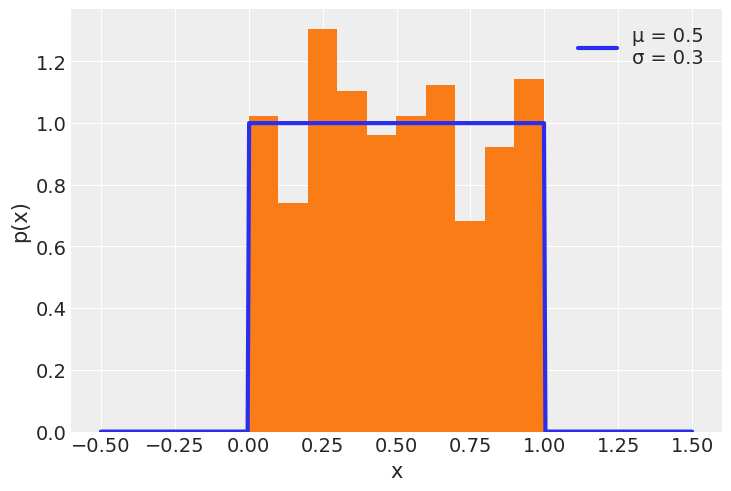

In [10]:
distri = stats.uniform(0, 1)  # distribución uniforme entre a=0 y b=1
x = np.linspace(-0.5, 1.5, 400)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot(x, x_pdf, lw=3,
         label=f'μ = {media:3.1f}\nσ = {varianza**0.5:3.1f}')
plt.hist(x_rvs, density=True)

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

En la figura anterior la curva azul representa la $pdf$. La $pdf$ es un objeto matemático que da la descripción exacta de la distribución, no es algo que exista en la _realidad_ si no una construcción matemática que es útil para aproximar o modelar algún aspecto de la _realidad_. La $pdf$ es como las esferas, las esferas no existen pero pueden ser útiles para describir objetos tales como pelotas, planetas, átomos, aún cuando ni las pelotas, planetas o átomos sean esferas.

El histograma en naranja representa una muestra tomadas a partir de la $pdf$ representada en azul. A diferencia de la curva azul, que es un objeto (matemático) concreto. Una muestra es aleatoria. Cada vez que ejecutemos la celda anterior la curva azul será la misma pero el histograma cambiará.

Una aclaración antes de continuar. Los histogramas no son lo mismo que los gráficos de barras. Los histogramas son una forma de representación visual de datos que usa barras a fin de aproximar una distribución continua. Si bien la cantidad de barras es discreta, la distribución que intenta aproximar es continua, es por ello que las barras se dibujan de forma contigua, mientras que en los gráficos de barras (que representan distribuciones discretas) las barras se dibujan espaciadas.

Luego de estas aclaraciones continuemos con otras distribuciones de probabilidad continuas.

#### Distribución Gaussiana (o normal)

Es quizá la [distribución](https://en.wikipedia.org/wiki/Normal_distribution) más conocida. Por un lado por que muchos fenómenos pueden ser descriptos (aproximadamente) usando esta distribución. Por otro lado por que posee ciertas propiedades matemáticas que facilitan trabajar con ella de forma analítica. Es por ello que muchos de los resultados de la estadística frecuentista se basan en asumir una distribución Gaussiana.

La distribución Gaussiana queda definida por dos parámetros, la media $\mu$ y la desviación estándar $\sigma$. Una distribución Gaussiana con $\mu = 0$ y $\sigma = 1$ es conocida como la _distribución Gaussiana estándar_.

$$
p(x \mid \mu,\sigma) = \frac{1}{\sigma \sqrt{ 2 \pi}} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2}} \tag {0.11}
$$

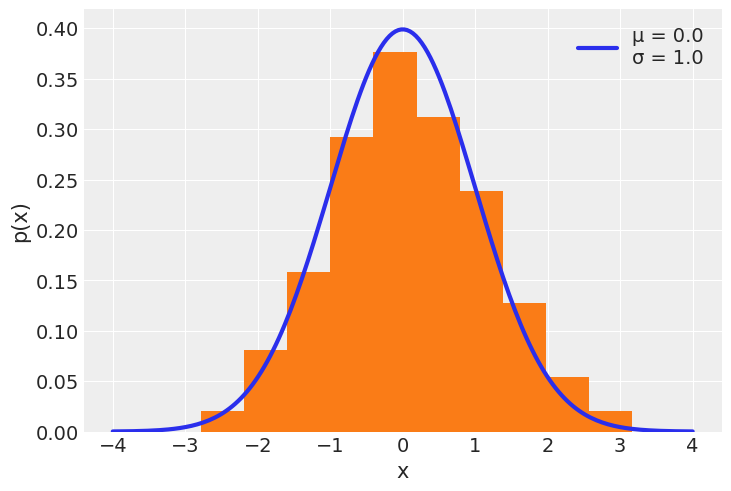

In [11]:
distri = stats.norm(loc=0, scale=1)  # media cero y desviación standard 1
x = np.linspace(-4, 4, 200)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot(x, x_pdf, lw=3,
         label=f'μ = {media:3.1f}\nσ = {varianza**0.5:3.1f}')
plt.hist(x_rvs, density=True)

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

#### Distribución t de Student

Históricamente esta [distribución](http://es.wikipedia.org/wiki/Distribuci%C3%B3n_t_de_Student) surgió para estimar la media de una población normalmente distribuida cuando el tamaño de la muestra es pequeño. En estadística Bayesiana su uso más frecuente es el de generar modelos robustos a datos aberrantes.


$$p(x \mid \nu,\mu,\sigma) = \frac{\Gamma(\frac{\nu + 1}{2})}{\Gamma(\frac{\nu}{2})\sqrt{\pi\nu}\sigma} \left(1+\frac{1}{\nu}\left(\frac{x-\mu}{\sigma}\right)^2\right)^{-\frac{\nu+1}{2}} \tag {0.12}
$$

donde $\Gamma$ es la función [gamma](https://en.wikipedia.org/wiki/Gamma_function) y donde $\nu$ es un parámetro llamado _grados de libertad_ en la mayoría de los textos aunque también se le dice _grado de normalidad_, ya que a medida que $\nu$ aumenta la distribución se aproxima a una Gaussiana. En el caso extremo de $\lim_{\nu\to\infty}$ la distribución es exactamente igual a una Gaussiana.

En el otro _extremo_, cuando $\nu=1$, (aunque en realidad $\nu$ puede tomar valores por debajo de 1) estamos frente a una distribución de [Cauchy](https://en.wikipedia.org/wiki/Cauchy_distribution). Es similar a una Gaussiana pero las colas decrecen muy lentamente, eso provoca que en teoría esta distribución no poseen una media o varianza definidas. Es decir, es posible calcular a partir de un conjunto de datos una media, pero si los datos provienen de una distribución de Cauchy, la dispersión alrededor de la media será alta y esta dispersión no disminuirá a medida que aumente el tamaño de la muestra. La razón de este comportamiento extraño es que en distribuciones como la Cauchy están dominadas por lo que sucede en las colas de la distribución, contrario a lo que sucede por ejemplo con la distribución Gaussiana.

Para esta distribución $\sigma$ no es la desviación estándar, que como ya se dijo podría estar indefinida, $\sigma$ es la _escala_. A medida que $\nu$ aumenta la _escala_ converge a la desviación estándar de una distribución Gaussiana.

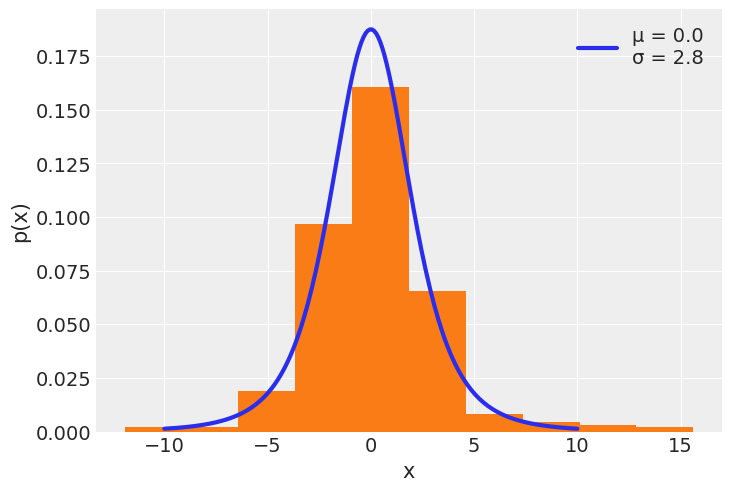

In [12]:
distri = stats.t(loc=0, scale=2, df=4)  # media 0, escala 2, grados de libertad 4
x = np.linspace(-10, 10, 200)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot(x, x_pdf, lw=3,
         label=f'μ = {media:3.1f}\nσ = {varianza**0.5:3.1f}')
plt.hist(x_rvs, density=True)

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

#### Distribución exponencial

La distribución [exponencial](https://en.wikipedia.org/wiki/Exponential_distribution) se define solo para $x > 0$. Esta distribución se suele usar para describir el tiempo que transcurre entre dos eventos que ocurren de forma continua e independiente a una taza fija. El número de tales eventos para un tiempo fijo lo da la distribución de Poisson.

$$
p(x \mid \lambda) = \lambda e^{-\lambda x} \tag {0.13}
$$

La media y la desviación estándar de esta distribución están dadas por $\frac{1}{\lambda}$ 

Scipy usa una parametrización  diferente donde la escala es igual a $\frac{1}{\lambda}$

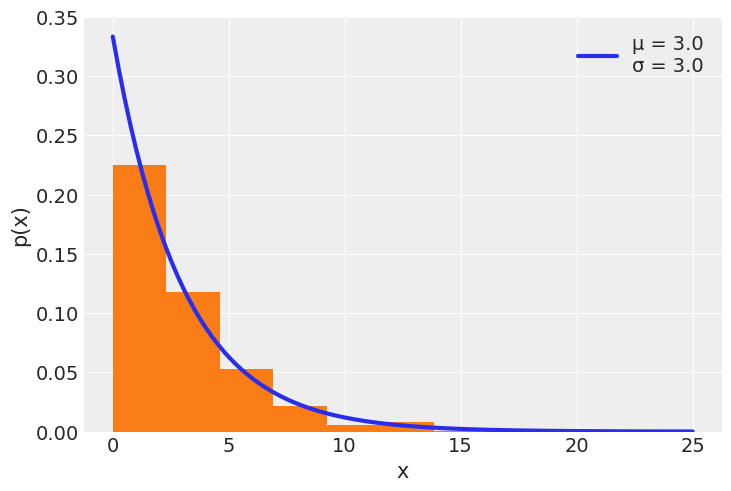

In [13]:
distri = stats.expon(scale=3)  # escala 3, lambda = 1/3
x = np.linspace(0, 25, 100)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot(x, x_pdf, lw=3,
         label=f'μ = {media:3.1f}\nσ = {varianza**0.5:3.1f}')
plt.hist(x_rvs, density=True)

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

#### Distribución de Laplace

También llamada distribución [doble exponencial](https://en.wikipedia.org/wiki/Laplace_distribution), ya que puede pensarse como una distribución exponencial "más su imagen especular". Esta distribución surge de medir la diferencia entre dos variables exponenciales (idénticamente distribuidas). 

$$p(x \mid \mu, b) = \frac{1}{2b} \exp \left\{ - \frac{|x - \mu|}{b} \right\} \tag {0.14}$$


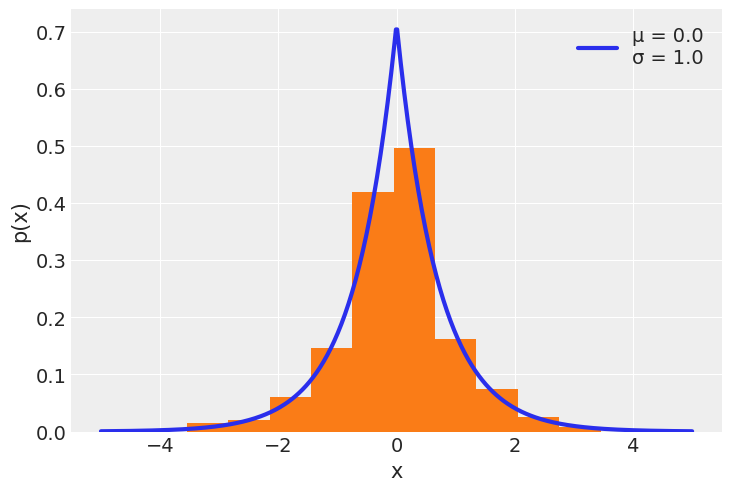

In [14]:
distri = stats.laplace(0, 0.7)  # escala 3, lambda = 1/3
x = np.linspace(-5, 5, 500)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot(x, x_pdf, lw=3,
         label=f'μ = {media:3.1f}\nσ = {varianza**0.5:3.1f}')
plt.hist(x_rvs, density=True)

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

#### Distribución beta

Es una [distribución](https://en.wikipedia.org/wiki/Beta_distribution) definida en el intervalo [0, 1]. Se usa para modelar el comportamiento de variables aleatorias limitadas a un intervalo finito. Es útil para modelar proporciones o porcentajes. 

$$
p(x \mid \alpha, \beta)= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\, x^{\alpha-1}(1-x)^{\beta-1} \tag {0.15}
$$

El primer término es simplemente una constante de normalización que asegura que la integral de la $pdf$ de 1. $\Gamma$ es la función [gamma](https://en.wikipedia.org/wiki/Gamma_function). Cuando $\alpha=1$ y $\beta=1$ la distribución beta se reduce a la distribución uniforme.

Si queremos expresar la distribución beta en función de la media y la dispersión alrededor de la media podemos hacerlo de la siguiente forma.

$$\alpha = \mu \kappa$$
$$\beta = (1 − \mu) \kappa$$

Siendo $\mu$ la media y $\kappa$ una parámetro llamado concentración a media que $\kappa$ aumenta la dispersión disminuye. Nótese, además que $\kappa = \alpha + \beta$.

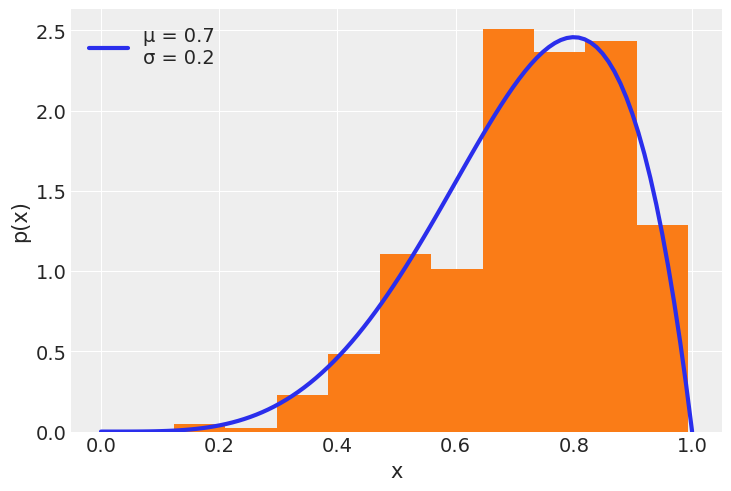

In [15]:
distri = stats.beta(5, 2)  # alfa=5, beta=2
x = np.linspace(0, 1, 100)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot(x, x_pdf, lw=3,
         label=f'μ = {media:3.1f}\nσ = {varianza**0.5:3.1f}')
plt.hist(x_rvs, density=True)

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

#### Distribución Gamma

Scipy parametriza a la distribución [gamma](https://en.wikipedia.org/wiki/Gamma_distribution) usando un parámetro $\alpha$ y uno $\theta$, usando estos parámetros la $pdf$ es:

$$
p(x \mid \alpha, \theta) = \frac{1}{\Gamma(\alpha) \theta^\alpha} x^{\alpha \,-\, 1} e^{-\frac{x}{\theta}} \tag {0.16}
$$

Una parametrización más común en estadística Bayesiana usa los parámetros $\alpha$ y  $\beta$, siendo $\beta = \frac{1}{\theta}$. En este caso la pdf queda como:

$$
p(x \mid \alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)} \tag {0.17}
$$


La distribución gamma se reduce a la exponencial cuando $\alpha=1$.

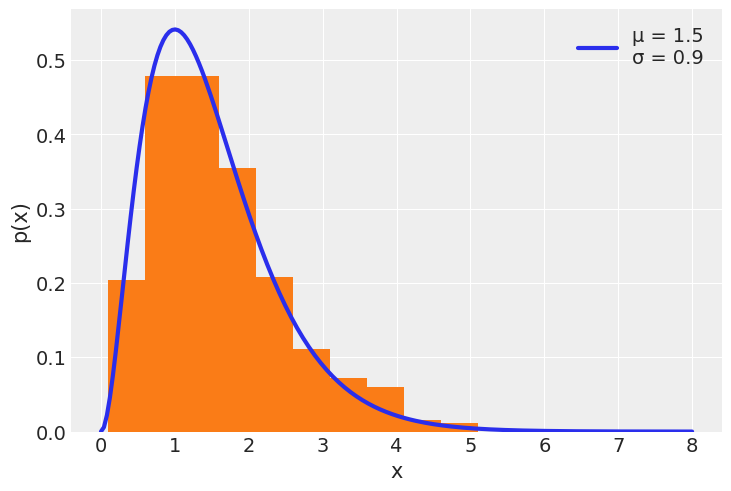

In [16]:
distri = stats.gamma(a=3, scale=0.5)  # alfa 3, theta 0.5
x = np.linspace(0, 8, 200)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot (x, x_pdf, lw=3,
          label=f'μ = {media:3.1f}\nσ = {varianza**0.5:3.1f}')
plt.hist(x_rvs, density=True)

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

### Relación entre probabilidad conjunta, condicional y marginal

Al definir probabilidad condicional usamos la _expresión 0.5_. Ahora que ya estamos familiarizados con las distribuciones de probabilidad podemos representar gráficamente los tres términos en la *expresión 0.5*, tal como se muestra en la siguiente figura.

<img src="img/probabilidades.png" width=500>

* Probabilidad conjunta $p(A, B)$
* Probabilidad marginal $p(A)$ o $p(B)$ 
* Probabilidad condicional $p(A \mid B)$

Podemos re-escribir la _expresión 0.5_ de la siguiente manera:

$$
p(A, B) = p(A \mid B) {p(B)}  \tag {0.18}
$$

Es decir si tomo una probabilidad condicional y la _evalúo_ para todos los valores de la cantidad _condicionante_ ($B$ en este caso), obtengo la distribución conjunta. Esto se puede ver graficamente si pensamos que $p(A \mid B)$ es una _rebanada_ de p(A, B); rebanada que tomamos _a la altura_ de $B$. Si tomamos todas las rebanadas entonces obtendremos $p(A, B)$.

Para obtener las probabilidades marginales, que se encuentran en los _margenes_ 😉, podemos calcular algo similar:

$$
p(A) = \sum_B p(A, B) = \sum_B p(A \mid B) {p(B)} \tag {0.19}
$$ 

Cambiando la sumatoria por una integral para distribuciones continuas.

### Distribución acumulada

La `pdf` (o la `pmf`) son formas comunes de representar y trabajar con variables aleatorias, pero no son las únicas formas posibles. Existen otras representaciones equivalentes. Por ejemplo la función de distribución acumulada (`cdf` en inglés). Al integrar una `pdf` se obtiene la correspondiente `cdf`, y al derivar la `cdf` se obtiene la `pdf`.


La integral de la `pdf` es llamada función de distribución acumulada (`cdf`):

$$
cdf(x) = \int_{-\infty}^{x} pdf(x) d(x) \tag {0.20}
$$

En algunas situaciones se prefiere hablar de la función de supervivencia:

$$
S(x) = 1 - cdf  \tag {0.21}
$$


A continuación un ejemplo de la `pdf` y `cdf` para 4 distribuciones de la familia Gaussiana.

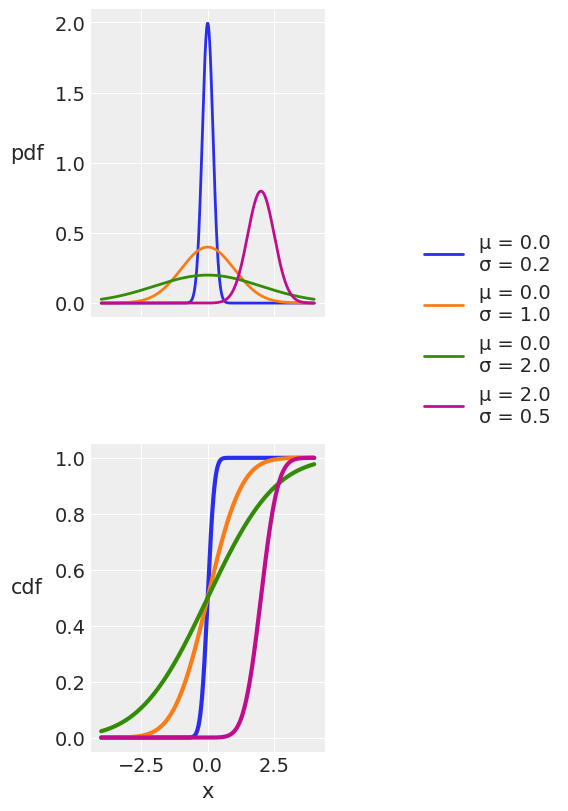

In [17]:
_, ax = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
x_valores = np.linspace(-4, 4, 500)
valores = [(0., .2), (0., 1.), (0., 2.), (2., .5)]
color = ['C0', 'C1', 'C2', 'C3']
for val, c in zip(valores, color):
    pdf = stats.norm(*val).pdf(x_valores)
    cdf = stats.norm(*val).cdf(x_valores)
    ax[0].plot(x_valores, pdf, lw=2, color=c,
               label=f'μ = {val[0]}\nσ = {val[1]}')
    ax[1].plot(x_valores, cdf, lw=3, color=c)
ax[0].set_ylabel('pdf', rotation=0, labelpad=20)
ax[0].legend(bbox_to_anchor=(1.35, 0.33))
ax[1].set_ylabel('cdf', rotation=0, labelpad=20)
ax[1].set_xlabel('x');


La siguiente figura tomada del libro [Think Stats](http://greenteapress.com/thinkstats2/html/index.html) resume las relaciones entre la `cdf`, `pdf` y `pmf`.

<img src='img/cmf_pdf_pmf.png' width=600 >

## Comparando dos distribuciones

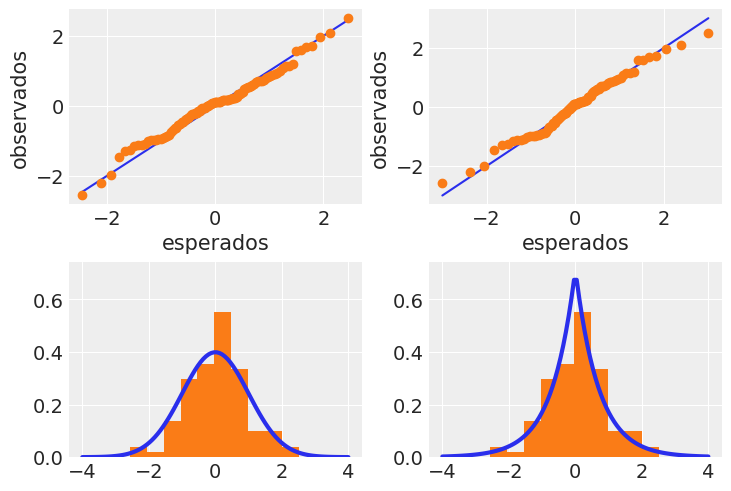

In [18]:
muestra = np.random.normal(0, 1, 100)
dist = stats.norm(0, 1), stats.laplace(scale=0.7)
x = np.linspace(-4, 4, 100)
dist_pdf = dist[0].pdf(x), dist[1].pdf(x)


_, ax = plt.subplots(2, 2, constrained_layout=True)
for i in range(2):
    osm, osr = stats.probplot(muestra, fit=False, dist=dist[i])
    ax[0,i].plot(osm, osm)
    ax[0,i].plot(osm, osr, 'o')
    ax[0,i].set_xlabel('esperados')
    ax[0,i].set_ylabel('observados')
    ax[1, i].plot(x, dist_pdf[i], lw=3)
    ax[1, i].hist(muestra, density=True)
    ax[1, i].set_ylim(0, np.max(dist_pdf) * 1.1)

## Límites 

Los dos teoremas más conocidos y usados en probabilidad son la ley de los grandes números y el teorema del límite central. Ambos nos dicen que le sucede a la media muestral a medida que el tamaño de la muestra aumenta.

### La ley de los grandes números

El valor promedio calculado para una muestra converge al valor esperado (media) de dicha distribución. Esto no es cierto para algunas distribuciones como la distribución de Cauchy (la cual no tiene media ni varianza finita).

La ley de los grandes números se suele malinterpretar y dar lugar a la paradoja del apostador. Un ejemplo de esta paradoja es creer que conviene apostar en la lotería/quiniela a un número _atrasado_, es decir un número que hace tiempo que no sale. El razonamiento, erróneo, es que como todos los números tienen la misma probabilidad a largo plazo si un número viene _atrasado_ entonces hay alguna especie de fuerza que aumenta la probabilidad de ese número en los próximo sorteos para así re-establecer la equiprobabilidad de los números.

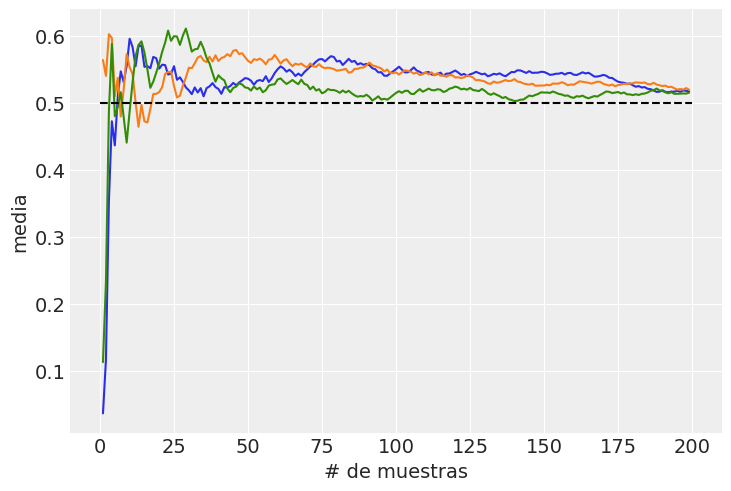

In [19]:
tamaño_muestra = 200
muestras = range(1, tamaño_muestra)
dist = stats.uniform(0, 1)
media_verdadera = dist.stats(moments='m')

for _ in range(3):
    muestra = dist.rvs(tamaño_muestra)
    media_estimada = [muestra[:i].mean() for i in muestras]
    plt.plot(muestras, media_estimada, lw=1.5)

plt.hlines(media_verdadera, 0, tamaño_muestra, linestyle='--', color='k')
plt.ylabel("media", fontsize=14)
plt.xlabel("# de muestras", fontsize=14);

### El teorema central del límite

El teorema central del límite (también llamado teorema del límite central) establece que si tomamos $n$ valores (de forma independiente) de una distribución arbitraria la media $\bar X$ de esos valores se _distribuirá aproximadamente como_ una Gaussiana a medida que ${n \rightarrow \infty}$:

$$
\bar X_n \dot\sim \mathcal{N} \left(\mu,  \frac{\sigma^2}{n}\right) \tag {0.22}
$$

Donde $\mu$ y $\sigma^2$ son la media y varianza poblacionales.

Para que el teorema del límite central se cumpla se deben cumplir los siguientes supuestos:

1. Las variables se muestrean de forma independiente
1. Las variables provienen de la misma distribución
1. La media y la desviación estándar de la distribución tiene que ser finitas

Los criterios 1 y 2 se pueden relajar _bastante_ y aún así obtendremos aproximadamente una Gaussiana, pero del criterio 3 no hay forma de escapar. Para distribuciones como la distribución de Cauchy, que no posen media ni varianza definida este teorema no se aplica. El promedio de $N$ valores provenientes de una distribución Cauchy no siguen una Gaussiana sino una distribución de Cauchy.

El teorema del límite central explica la prevalencia de la distribución Gaussiana en la naturaleza. Muchos de los fenómenos que estudiamos se pueden explicar como fluctuaciones alrededor de una media, o ser el resultado de la suma de muchos factores diferentes. Además, las Gaussianas son muy comunes en probabilidad, estadística y _machine learning_ ya que que esta familia de distribuciones son más simples de manipular matemáticamente que muchas otras distribuciones.

A continuación vemos una simulación que nos muestra el teorema del límite central en acción.

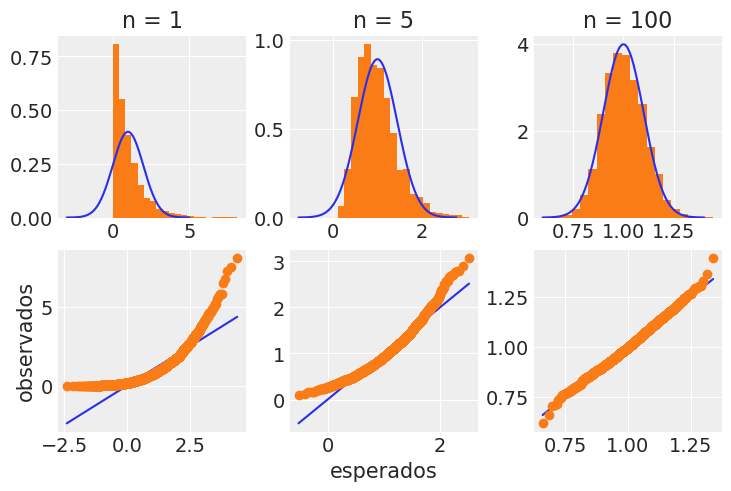

In [20]:
iters = 2000
distri = stats.expon(scale=1)
media, var = distri.stats(moments='mv')

_, ax = plt.subplots(2, 3, constrained_layout=True)

for i, n in enumerate([1, 5, 100]):
    sample = np.mean(distri.rvs((n, iters)), axis=0)

    sd = (var/n)**0.5 
    x = np.linspace(media - 4 * sd, media + 4 * sd, 200)
    ax[0, i].plot(x, stats.norm(media, sd).pdf(x))
    ax[0, i].hist(sample, density=True, bins=20)
    ax[0, i].set_title('n = {}'.format(n))
    osm, osr = stats.probplot(sample, dist=stats.norm(media, sd), fit=False)
    ax[1, i].plot(osm, osm)
    ax[1, i].plot(osm, osr, 'o')
ax[1, 0].set_ylabel('observados')
ax[1, 1].set_xlabel('esperados');

## Ejercicios


 Los siguientes ejercicios se deben realizar usando Python (y NumPy, SciPy, Matplotlib)
1. Ilustrar que la distribución de Poisson se aproxima a una binomial cuando para la binomial $n >> p$.

1. Para alguna de las distribuciones discretas presentadas en esta notebook verificar que la probabilidad total es 1.

1. Para alguna de las distribuciones continuas presentadas en esta notebook verificar que el área bajo la curva es 1.

1. Obtener la cdf a partir de la pdf (usar el método pdf provisto por SciPy). La función `np.cumsum` puede ser de utilidad.

1. Obtener la pdf a partir de la cdf (usar el método cdf provisto por SciPy). La función `np.diff` puede ser de utilidad.

1. Repetir la simulación para la ley de los grandes números para al menos 3 distribuciones de probabilidad. Para cada distribución probar más de un conjunto de parámetros.

1. Repetir la simulación para el teorema central del límite para al menos 3 distribuciones de probabilidad. Para cada distribución probar más de un conjunto de parámetros.

1. Mostrar en un gráfico que la media $\bar X$ converge a $\mu$ y la varianza converge a $\frac{\sigma^2}{n}$ a medida que aumenta el tamaño de la muestra.